In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv("/content/goog (1).csv")

In [ ]:
data

,Date,Open,High,Low,Close,Volume
0,12/19/2016,790.219971,797.659973,786.270020,794.200012,1225900
1,12/20/2016,796.760010,798.650024,793.270020,796.419983,925100
2,12/21/2016,795.840027,796.676025,787.099976,794.559998,1208700
3,12/22/2016,792.359985,793.320007,788.580017,791.260010,969100
4,12/23/2016,790.900024,792.739990,787.280029,789.909973,623400
...,...,...,...,...,...,...
56,3/13/2017,844.000000,848.684998,843.250000,845.539978,1149500
57,3/14/2017,843.640015,847.239990,840.799988,845.619995,779900
58,3/15/2017,847.590027,848.630005,840.770020,847.200012,1379600
59,3/16/2017,849.030029,850.849976,846.130005,848.780029,970400


In [ ]:
df = data["Close"].values.reshape(-1,1)


In [ ]:
df

array([[794.200012],
       [796.419983],
       [794.559998],
       [791.26001 ],
       [789.909973],
       [791.549988],
       [785.049988],
       [782.789978],
       [771.820007],
       [786.140015],
       [786.900024],
       [794.02002 ],
       [806.150024],
       [806.650024],
       [804.789978],
       [807.909973],
       [806.359985],
       [807.880005],
       [804.609985],
       [806.070007],
       [802.174988],
       [805.02002 ],
       [819.309998],
       [823.869995],
       [835.669983],
       [832.150024],
       [823.309998],
       [802.320007],
       [796.789978],
       [795.695007],
       [798.530029],
       [801.48999 ],
       [801.340027],
       [806.969971],
       [808.380005],
       [809.559998],
       [813.669983],
       [819.23999 ],
       [820.450012],
       [818.97998 ],
       [824.159973],
       [828.070007],
       [831.659973],
       [830.76001 ],
       [831.330017],
       [828.640015],
       [829.280029],
       [823.2

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mms = MinMaxScaler(feature_range=(0,1))
df = mms.fit_transform(df)

In [ ]:
size = int(len(df)*0.8)
train = df[:size,:]
test = df[size:,:]


In [ ]:
def create_dataset(data,step = 4):
  x = []
  y = []
  for i in range(len(data) - step):
    seq = data[i:i+step,0]
    target = data[i + step,0]
    x.append(seq)
    y.append(target)
  return np.array(x),np.array(y)

x_train,y_train = create_dataset(train,4)
x_test,y_test = create_dataset(test,4)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM , Dense

In [ ]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(4,1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mse',metrics = ['mse','mae'],optimizer = 'adam')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 4, 50)          │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(x_train,y_train,epochs = 51)

Epoch 1/51
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.2208 - mae: 0.4324 - mse: 0.2208
Epoch 2/51
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2031 - mae: 0.4124 - mse: 0.2031 
Epoch 3/51
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.1636 - mae: 0.3666 - mse: 0.1636
Epoch 4/51
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1267 - mae: 0.3193 - mse: 0.1267
Epoch 5/51
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1002 - mae: 0.2794 - mse: 0.1002
Epoch 6/51
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0790 - mae: 0.2411 - mse: 0.0790
Epoch 7/51
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0523 - mae: 0.1913 - mse: 0.0523
Epoch 8/51
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0360 - mae: 0.1610 - mse: 0.0360
Epoch 9/51
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0233 - mae: 0.1260 - mse: 0.0233 
Epoch 10/51
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0203 - mae: 0.1100 - mse: 0.0203
Epoch 11/51
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0285 - mae: 0.126

In [ ]:
model.evaluate(x_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step - loss: 0.0319 - mae: 0.1742 - mse: 0.0319


[0.03186200559139252, 0.03186200559139252, 0.1742052435874939]

In [ ]:
y_pred=mms.inverse_transform(model.predict(x_test))
y_test=mms.inverse_transform(np.array(y_test).reshape(-1,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


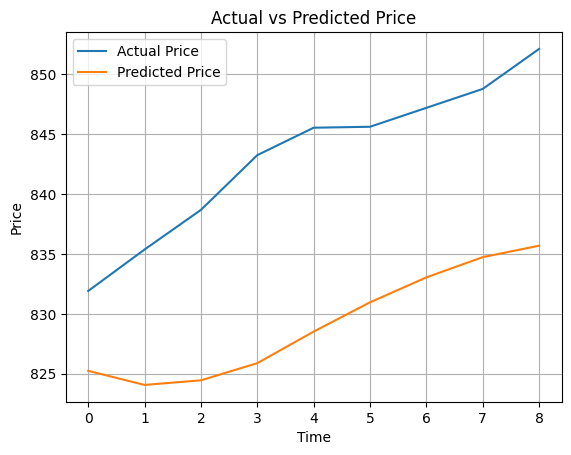

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y_test, label='Actual Price')

# Plotting the predicted prices
plt.plot(y_pred, label='Predicted Price')

plt.title('Actual vs Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()